In [1]:
import pandas as pd
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABHISHEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ABHISHEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
422,ham,Siva is in hostel aha:-.,NaN,NaN,NaN
4056,ham,Noice. Text me when you're here,NaN,NaN,NaN
506,ham,"Maybe westshore or hyde park village, the plac...",NaN,NaN,NaN
2724,ham,Nope... C Ì_ then...,NaN,NaN,NaN
5126,ham,"To the wonderful Okors, have a great month. We...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Steps to follow ---
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

### 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns
df.drop( columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
df.sample(5)

,v1,v2
5053,spam,Double Mins & Double Txt & 1/2 price Linerenta...
1624,spam,500 free text msgs. Just text ok to 80488 and ...
5038,ham,Pls clarify back if an open return ticket that...
2127,ham,Tessy..pls do me a favor. Pls convey my birthd...
312,ham,He says he'll give me a call when his friend's...


In [10]:
# Renaming the columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
3480,ham,Wherre's my boytoy ? :-(
5376,ham,I don't want you to leave. But i'm barely doin...
1552,ham,U too...
1594,ham,Never blame a day in ur life. Good days give u...
2993,ham,"No idea, I guess we'll work that out an hour a..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df = df.drop_duplicates(keep = 'first')

In [18]:
df.duplicated().sum()

np.int64(0)

### 3. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

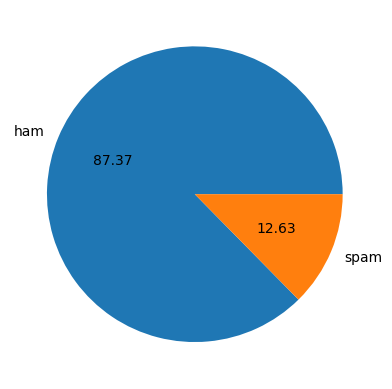

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show

In [22]:
# Data is imbalance

In [23]:
df['characters_count'] = df['text'].apply(len)

In [24]:
# number of words
df['words_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,characters_count,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['sentences_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,characters_count,words_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['characters_count', 'words_count', 'sentences_count']].describe()

,characters_count,words_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# ham messages
df[df['target'] == 0][['characters_count', 'words_count', 'sentences_count']].describe()

,characters_count,words_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# span messages
df[df['target'] == 1][['characters_count', 'words_count', 'sentences_count']].describe()

,characters_count,words_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='characters_count', ylabel='Count'>

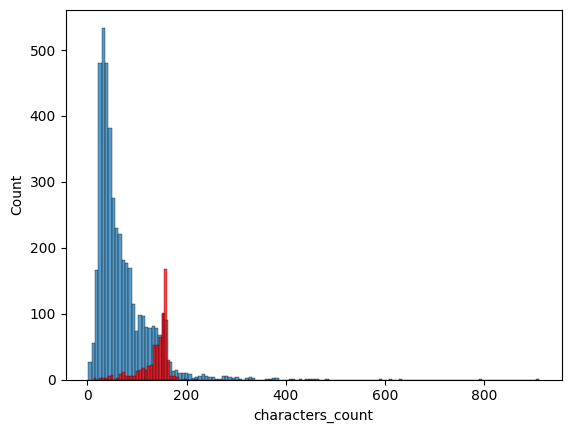

In [32]:
sns.histplot(df[df['target'] == 0]['characters_count'])
sns.histplot(df[df['target'] == 1]['characters_count'], color = 'red')

<Axes: xlabel='words_count', ylabel='Count'>

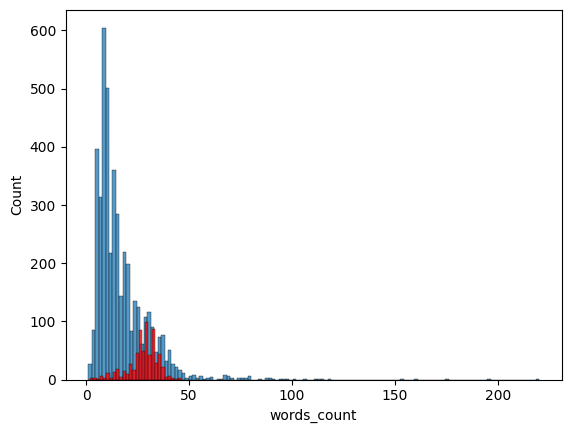

In [33]:
sns.histplot(df[df['target'] == 0]['words_count'])
sns.histplot(df[df['target'] == 1]['words_count'], color = 'red')

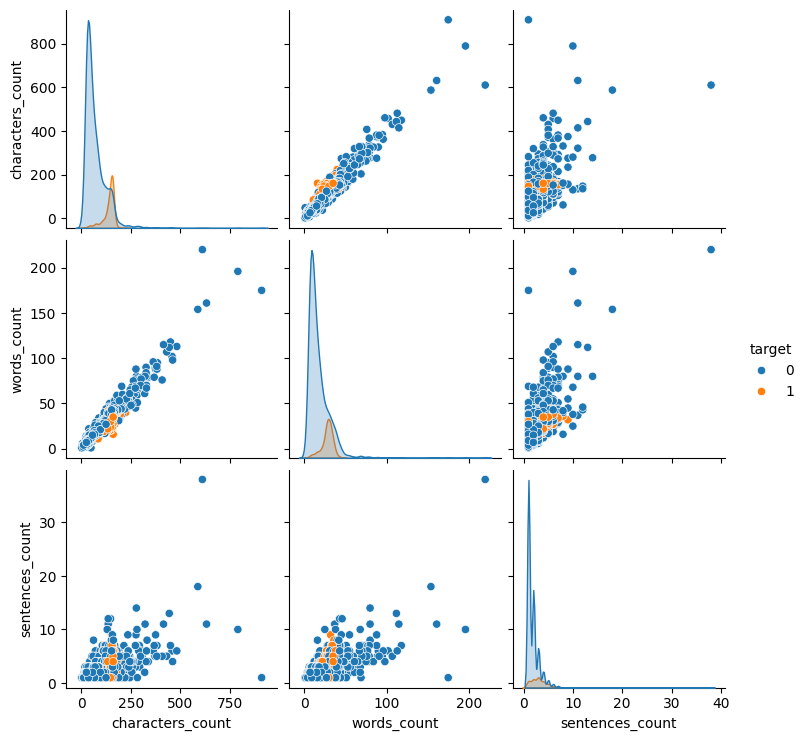

In [34]:
sns.pairplot(df, hue = 'target')

<Axes: >

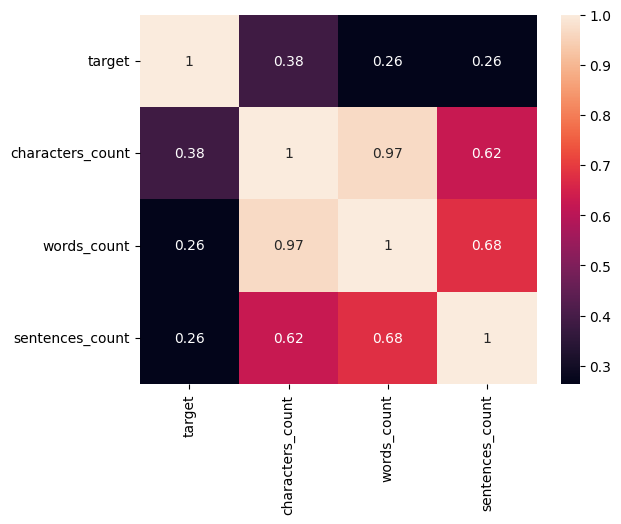

In [35]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

### 3. Data Preprocessing

<li> Lower case
<li> Tokenization
<li> Removing special characters
<li> Removing stop words and punctutation
<li> Stemming

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABHISHEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
import string

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    y = []
    for i in tokens:
        if i.isalnum():
            y.append(i)

    tokens = y[:]
    y.clear()

    for i in tokens:
        if i not in stopwords.words('english'):
            y.append(i)

    tokens = y[:]
    y.clear()

    for i in tokens:
        y.append(ps.stem(i))

    return " ".join(y)


In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [42]:
spam_wc = wc.generate(
    df[df['target'] == 1]['transformed_text']
    .fillna('')
    .astype(str)
    .str.cat(sep=" ")
)

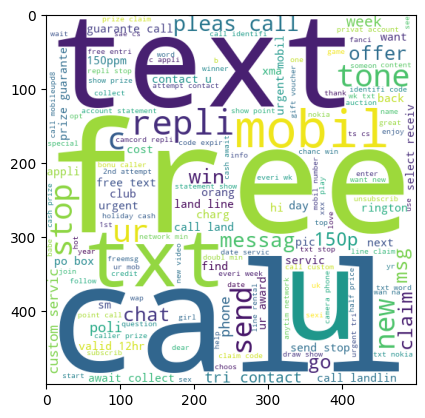

In [43]:
plt.imshow(spam_wc)

In [44]:
spam_wc = wc.generate(
    df[df['target'] == 0]['transformed_text']
    .fillna('')
    .astype(str)
    .str.cat(sep=" ")
)

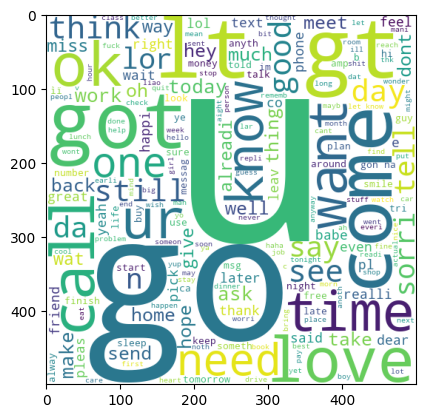

In [45]:
plt.imshow(spam_wc)

In [46]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text']:
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

In [48]:
df['transformed_text'].head()


0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transformed_text, dtype: object

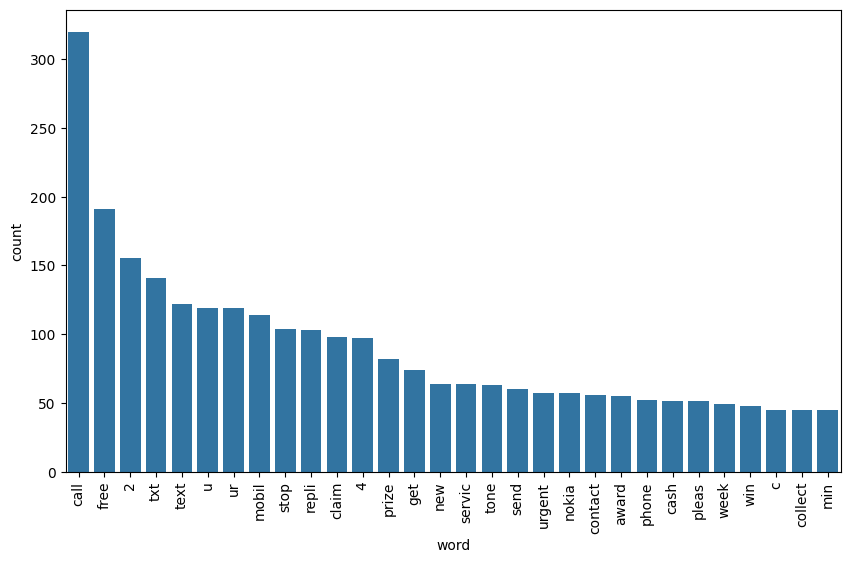

In [49]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)

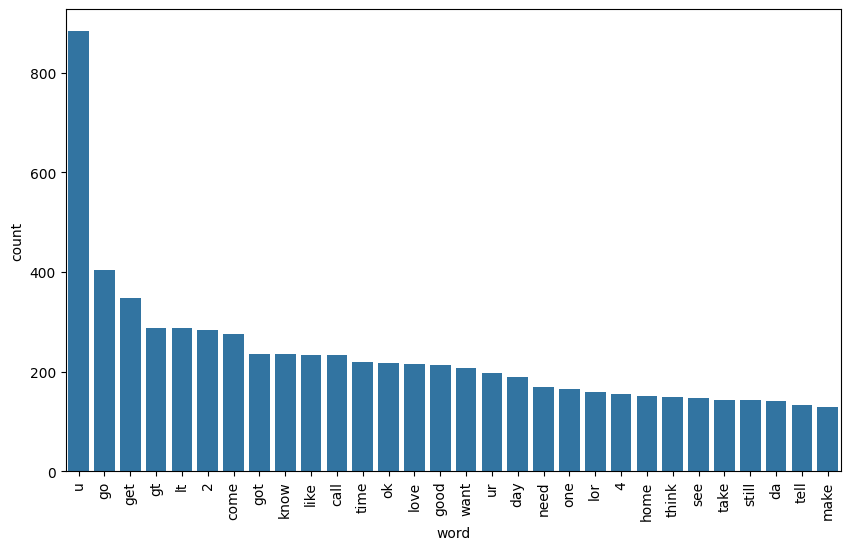

In [51]:
from collections import Counter
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word', 'count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# Text Vectorisation
# Using Bag of Words
df.head()

,target,text,characters_count,words_count,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4. Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
X.shape

(5169, 6708)

In [56]:
y = df['target'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [62]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [63]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [64]:
#tfidf --> MNB 

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [67]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'LR': lrc, 
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94


c:\Users\ABHISHEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\ABHISHEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.959381,1.000000
0,SVC,0.972921,0.974138
2,LR,0.951644,0.940000


In [73]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [74]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.959381
1,SVC,Accuracy,0.972921
2,LR,Accuracy,0.951644
3,NB,Precision,1.000000
4,SVC,Precision,0.974138
5,LR,Precision,0.940000


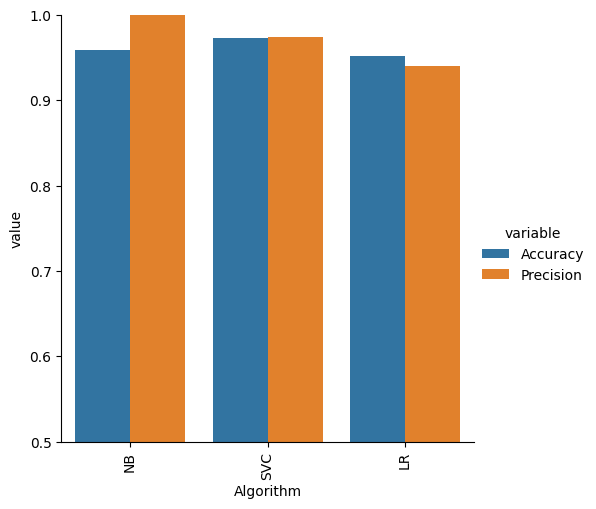

In [75]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Conclusion
An SMS Spam Detection system was built using NLP preprocessing and TF-IDF feature extraction.  
Multinomial Naive Bayes was selected as the final model due to its high precision and efficiency on text data.

In [76]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [77]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [79]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [80]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [81]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [82]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
1,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
2,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000


## Conclusion

In this project, an SMS Spam Detection system was developed using Natural Language Processing techniques and machine learning. Text data was preprocessed using tokenization, stopword removal, and stemming, followed by feature extraction using TF-IDF vectorization.

Multiple classification models were evaluated, and Multinomial Naive Bayes was selected as the final model due to its high precision, computational efficiency, and suitability for text-based data. The model demonstrated reliable performance in distinguishing spam messages from legitimate messages.

This project highlights the effectiveness of traditional machine learning approaches in text classification tasks.

In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))